# Starbucks Capstone Challenge 

## Project Overview

Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. As the world's largest coffeehouse chain, Starbucks is seen to be the main representation of the United States' second wave of coffee culture. As of early 2020, the company operates over 30,000 locations worldwide in more than 70 countries. Starbucks locations serve hot and cold drinks, whole-bean coffee, microground instant coffee known as VIA, espresso, caffe latte, full- and loose-leaf teas including Teavana tea products, Evolution Fresh juices, Frappuccino beverages, La Boulange pastries, and snacks including items such as chips and crackers; some offerings (including their annual fall launch of the Pumpkin Spice Latte) are seasonal or specific to the locality of the store.(**TAKEN FROM :**  [WIKIPEDIA](https://en.wikipedia.org/wiki/Starbucks))

### In this capstone project i am discussing about three questions :

1. How an offer works in starbucks in general? What are the top offers provided by them?
2. What is change in market of starbucks when some offer is there?
3. How user action parameters(say viewed, offer recieved, transaction done, cancelled, completed) are related to demographic attributes or other attributes that company floats?

### Why i took this Project ?

I am very curious about how discounts/offers(e.g. buy 1 get1, family pack, veg combo etc) works, how company decides what to select, which parameters are more important, when should these offers be rolled out, for how many days offer should be there. Since i also prefer offers my self and ocassionally buy things from such places during discount month or if there is an offer. So more or less i find it interesting to analyse it and see how these thing works.

## Problem Statement

> 1. How an offer works in starbucks in general? What are the top offers provided by them?<br>
> 2. What is change in market of starbucks when some offer is there?<br>
> 3. How user action parameters(say viewed, offer recieved, transaction done, cancelled, completed) are related to demographic attributes or other attributes that company floats?<br>

## My strategy to solve the problem

So here i will be giving picture about how i will progress in the project as it will give you an idea on what you can expect to read further in your article. I have broken problems majorly in 4 stages. In first stage i am just exploring data using pandas dataframe functions, like df.head(), df.info(), df.describe(), here i will be just looking for any scope of preprocessing the dataset. In second stage i will be doing data cleaning where i will be handling multivalued columns by splitting them, handling large numbers, handling NaNs and typecasting data values to suitable form. After this i will make sure that data is ready for exploratory data analysis. In third stage i will be visualizing the dataset and will be commenting on the plot as per my understanding. For this i will be using matplotlib and seaborn library, and using barplots, histograms, pie-plots for better understanding. Finally for prediction purpose i will be using four machine learning models and evaluate the problem according to each of them. My method for evaluation would be F score and confusion matrix mainly.

### Dataset Structure

The data provided consists of 3 datasets:
- Offer portfolio(contains attributes of each offer)
- Demographic data(for each customer)
- Transactional records

### Imports & load in data

In [1]:
import numpy as np
import pandas as pd
import math
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [2]:
# reading jsons
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

# Data Exploration

## In this section I will be doing exploration of data, sequentially. Further I will decide the requirement of cleaning and modelling afterwards

### portfolio.json

**Short summary about dataset**

***Columns :***
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - 
* channels (list of strings)

Let's discuss more about data below

In [3]:
portfolio.shape

(10, 6)

In [4]:
portfolio.head(4)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9


>`Channels` column is bit weired need to manage it during cleaning phase. There might also be requirement of standardazation/normalization/scaling of data also. Further other features are straigh-forward. 

In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


>dtypes: int64(3), object(3)

In [6]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


>Dataset seems ideal as min-max, mean and standard-deviation are normal and iam not seeing any sign of abruptness in terms of statistics(i am saying it loosely, lot to be discuss afterwards)

In [7]:
#check for null values
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

> No missing value in dataset

In [8]:
#check no. of unique offers
print(len(portfolio.id.unique()))

10


> 10 unique ids are present in dataset

### profile.json

**Short summary about dataset**

***Columns :***

* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

Let's discuss more about data below

In [9]:
profile.shape

(17000, 5)

In [10]:
profile.head(4)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0


> 1. Null values in `gender` and `income` 
> 2. `age` has some absurd values(e.g. 118).

<AxesSubplot:>

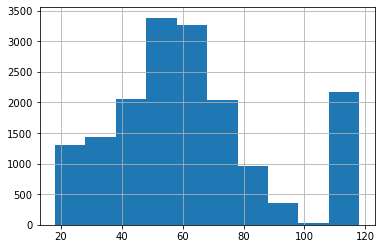

In [11]:
#check distribution of age column
profile.age.hist()

> Something wrong with ages, as we can't say them as outlier too as they are in large amount

In [12]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


> dtypes: float64(1), int64(2), object(2)

In [13]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


> This dataset is really weired, exactly opposite to the previous one, we need to do lot of work in this.

In [14]:
#check for null values
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [15]:
#check how many unique people are in dataset
print(len(profile.id.unique()))

17000


>17000 unique ids are present in dataset

### transcript.json

**Short summary about dataset**

***Columns :***

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

Let's discuss more about data below

In [16]:
transcript.shape

(306534, 4)

In [17]:
transcript.head(4)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0


> value is in dictionary form so we will take care of that

In [18]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


> dtypes: int64(1), object(3)

In [19]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


> Variance of this dataset is very high, we might need some normalization

In [20]:
#check for null values
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

> No null values in dataset

In [21]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

> These are the parameters which we are discussing.

In [22]:
#check number of unique people represented
print(transcript['person'].nunique())

17000


> 17000 unique persons are there in the dataset

# Data Cleaning

## Portfolio Dataset

> Portfolio dataset itself was fine so we need just few touchups in this case:<br><br>
    1.Creating a copy of the original dataframe.<br>
    2.Convert the column 'Channels' into 4 different channel on the basis of different types of channel.


In [23]:
portfolio_clean = portfolio.copy()

> Dataset copied in case something went wrong

In [24]:
temp = pd.get_dummies(portfolio_clean.channels.apply(pd.Series).stack())
temp = temp.sum(level=0)
portfolio_clean = pd.concat([portfolio_clean, temp], axis=1)

> `channel` column being multivalues is converted to single columns for analysis

In [25]:
portfolio_clean = portfolio_clean.drop(columns='channels')

> dropping old columns(multivalued)

In [26]:
portfolio_clean.head(4)

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1


> We can see changes are reflecting in the dataset

In [27]:
portfolio_clean.info()
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   difficulty  10 non-null     int64 
 2   duration    10 non-null     int64 
 3   offer_type  10 non-null     object
 4   id          10 non-null     object
 5   email       10 non-null     uint8 
 6   mobile      10 non-null     uint8 
 7   social      10 non-null     uint8 
 8   web         10 non-null     uint8 
dtypes: int64(3), object(2), uint8(4)
memory usage: 568.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id      

> `Comparision` between previous dataset and our brand new dataset

## Profile Dataset

> According to initial analysis following cleaning steps are must needed:<br><br>
    1. Creating a copy of the original dataframe.<br>
    2. Gender and income has missing values.<br>
    3. Age has 118 as encoding for NaNs.<br>
    4. became_member_on can/should be changed to datetime i.e., convert the datatype of 'became_member_on' column and sort the date into proper format.<br>

In [28]:
profile_clean = profile.copy()

In [29]:
profile_clean.gender.value_counts(dropna=False) / profile_clean.shape[0]

M      0.499059
F      0.360529
NaN    0.127941
O      0.012471
Name: gender, dtype: float64

> We can see how much fractions are NaN we will fix it at last

In [30]:
# Age above 118 is irrelevant
profile_clean.loc[profile_clean["age"] == 118, "age"] = None

> Fixing age issue, as age above 118 is irrelavant further it is encoded as NaN so converting it to None, so that it makes more sense

In [31]:
# Fixing date-time
profile_clean['became_member_on'] = pd.to_datetime(profile_clean['became_member_on'], format='%Y%m%d')

> Date is converted to correct format for easy analysis in future

In [32]:
bool1 = profile_clean["gender"].notna()
bool2 = profile_clean["age"].notna()
bool3 = profile_clean["income"].notna()
profile_clean[bool1 | bool2 | bool3].isna().any(axis=1).sum() == 0

True

> Great! NaN values are overlapping completely, this was much needed at this time :), now my work is little bit easy

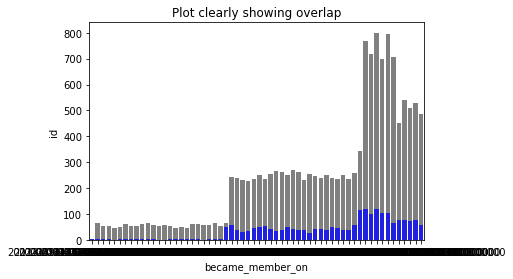

In [33]:
# ... for not having NaNs in gender, age, income
sns.barplot(
    data=(
        profile_clean[profile_clean["age"].notna()]
        [["became_member_on", "id"]]
        .set_index("became_member_on")
        .resample("M")
        .count()
        .reset_index()
    ),
    x="became_member_on",
    y="id",
    color="grey"
)
# ... for having NaNs in gender, age, income
sns.barplot(
    data=(
        profile_clean[profile_clean["age"].isna()]
        [["became_member_on", "id"]]
        .set_index("became_member_on")
        .resample("M")
        .count()
        .reset_index()
    ),
    x="became_member_on",
    y="id",
    color="blue"
)
# Set title
plt.title("Plot clearly showing overlap");

> Since frequency of NaN values are very high, so dopping them is not a good choice, so currently i am not dropping them as they are highly aligned(highly overlapping), further i when it is required i will take decision at that point(like replacing it with mean, median or mode of whole column, but this is highly specific to analysis)

In [34]:
# Fixing Datatype issues
profile_clean["id"] = profile_clean["id"].astype(str)
profile_clean["age"] = profile_clean["age"].astype(float)
profile_clean["income"] = profile_clean["income"].astype(float)
profile_clean["became_member_on"] = profile_clean["became_member_on"].astype('datetime64[ns]')
profile_clean["gender"] = profile_clean["gender"].astype(object)

> Dataset dtype is converted, this will double check and ensure buglessness in future

In [35]:
print("Old")
print(profile.head(2))
print("New")
print(profile_clean.head(2))

Old
  gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
New
  gender   age                                id became_member_on    income
0   None   NaN  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12       NaN
1      F  55.0  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0


> See the change in old and new

In [36]:
profile_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  float64       
 2   id                17000 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 664.2+ KB


## Transcript Dataset

> According to initial analysis following cleaning steps are must needed:<br><br>
    1. Copy the dataset<br>
    2. Name change from 'person' to 'id'.(helpful in merging)<br>
    3. 'Event' splits into 4 different columns on the basis of different types of event.<br>
    4. 'Values' splits into 2 different column.<br>


In [37]:
transcript_clean = transcript.copy()

In [38]:
transcript_clean = transcript_clean.rename(columns={'person':'id'})

> Name changing occured!

In [39]:
transcript_clean['event'] = transcript_clean['event'].str.replace(' ', '-')
transcript_clean['event'].value_counts()

transaction        138953
offer-received      76277
offer-viewed        57725
offer-completed     33579
Name: event, dtype: int64

> We can see the change above, note dtype is int which is good thing

In [40]:
temp = pd.get_dummies(transcript_clean['event'])
transcript_clean = pd.concat([transcript_clean, temp], axis=1 )

> Splitting the event and then appending it to original dataframe `transcript_clean`

In [41]:
transcript_clean['offer_id'] = [[*i.values()][0] if 
                                [*i.keys()][0] in ['offer id','offer_id'] 
                                                 else None for i in transcript_clean.value]
transcript_clean.shape

(306534, 9)

> Fixing offer_id column especially when it's not null, please see the shape also

In [42]:
transcript_clean['amount'] = [np.round([*i.values()][0], 2) if [*i.keys()][0] == 'amount' 
                                                             else None for i in transcript_clean.value]
transcript_clean.shape

(306534, 10)

> Fixing amount column similar to above when it's not null(splitting into two), please see the change in shape also.

In [43]:
transcript_clean = transcript_clean.drop(columns='value')

> Dropping redundant column

In [44]:
print("Old")
print(transcript.head(2))
print("\n\nNew")
print(transcript_clean.head(2))

Old
                             person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  


New
                                 id           event  time  offer-completed  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer-received     0                0   
1  a03223e636434f42ac4c3df47e8bac43  offer-received     0                0   

   offer-received  offer-viewed  transaction  \
0               1             0            0   
1               1             0            0   

                           offer_id  amount  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN  


In [45]:
transcript_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               306534 non-null  object 
 1   event            306534 non-null  object 
 2   time             306534 non-null  int64  
 3   offer-completed  306534 non-null  uint8  
 4   offer-received   306534 non-null  uint8  
 5   offer-viewed     306534 non-null  uint8  
 6   transaction      306534 non-null  uint8  
 7   offer_id         167581 non-null  object 
 8   amount           138953 non-null  float64
dtypes: float64(1), int64(1), object(3), uint8(4)
memory usage: 12.9+ MB


> Above is the information about the latest cleaned dataset

## Merging and storing final dataset

##### Lets look at all the datasets which we are having, for merging

In [46]:
portfolio_clean.head(2)

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1


In [47]:
portfolio_clean = portfolio_clean.rename(columns={'id':'offer_id'})

> Column name change is required for merging

In [48]:
portfolio_clean.head(2)

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1


In [49]:
profile_clean.head(2)

,gender,age,id,became_member_on,income
0,None,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0


In [50]:
transcript_clean.head(2)

,id,event,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer-received,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


> It is clearly visible that we can join these table based on id(that's why i changed name), after merging we will use offer_id also for joining factor, the final dataset will be the combination of all.

In [51]:
temp = pd.merge(transcript_clean, profile_clean, on='id')

In [52]:
df_cleaned = pd.merge(temp, portfolio_clean, on='offer_id', how='left')

> Final merged dataframe is `df_cleaned`

In [53]:
df_cleaned.head(2)

,id,event,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,gender,...,became_member_on,income,reward,difficulty,duration,offer_type,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,...,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer-viewed,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,...,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0


In [54]:
df_cleaned.tail(2)

,id,event,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,gender,...,became_member_on,income,reward,difficulty,duration,offer_type,email,mobile,social,web
306532,3045af4e98794a04a5542d3eac939b1f,offer-viewed,576,0,0,1,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,F,...,2016-10-20,78000.0,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0
306533,da7a7c0dcfcb41a8acc7864a53cf60fb,transaction,582,0,0,0,1,None,0.35,None,...,2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_cleaned.describe()

,time,offer-completed,offer-received,offer-viewed,transaction,amount,age,income,reward,difficulty,duration,email,mobile,social,web
count,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000,138953.000000,272762.000000,272762.000000,167581.00000,167581.000000,167581.000000,167581.0,167581.000000,167581.000000,167581.000000
mean,366.382940,0.109544,0.248837,0.188315,0.453304,12.777356,53.840696,64337.000755,4.41991,7.850401,6.610737,1.0,0.917944,0.656996,0.806858
std,200.326314,0.312321,0.432340,0.390964,0.497815,30.250529,17.551337,21243.762941,3.37336,5.048944,2.136130,0.0,0.274451,0.474714,0.394765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,18.000000,30000.000000,0.00000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000,0.000000,0.000000,2.780000,41.000000,48000.000000,2.00000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,408.000000,0.000000,0.000000,0.000000,0.000000,8.890000,55.000000,62000.000000,5.00000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
75%,528.000000,0.000000,0.000000,0.000000,1.000000,18.070000,66.000000,78000.000000,5.00000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,714.000000,1.000000,1.000000,1.000000,1.000000,1062.280000,101.000000,120000.000000,10.00000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


In [56]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                306534 non-null  object        
 1   event             306534 non-null  object        
 2   time              306534 non-null  int64         
 3   offer-completed   306534 non-null  uint8         
 4   offer-received    306534 non-null  uint8         
 5   offer-viewed      306534 non-null  uint8         
 6   transaction       306534 non-null  uint8         
 7   offer_id          167581 non-null  object        
 8   amount            138953 non-null  float64       
 9   gender            272762 non-null  object        
 10  age               272762 non-null  float64       
 11  became_member_on  306534 non-null  datetime64[ns]
 12  income            272762 non-null  float64       
 13  reward            167581 non-null  float64       
 14  diff

## More cleaning steps for final dataframe

`As we have scene that ids are long but there are only 10 unique values, so lets map them with some ordinal variable.`

In [57]:
df_cleaned_copy = df_cleaned.copy()

In [58]:
temp = pd.Series(df_cleaned_copy.offer_id.unique())
offer_dictionary = {}
for key,value in temp.to_dict().items():
    offer_dictionary[value]=key

In [59]:
df_cleaned_copy['offer_id']=df_cleaned_copy['offer_id'].map(offer_dictionary)
df_cleaned_copy['offer_id'].replace(1,np.nan)

0         0.0
1         0.0
2         NaN
3         0.0
4         NaN
         ... 
306529    9.0
306530    9.0
306531    9.0
306532    9.0
306533    NaN
Name: offer_id, Length: 306534, dtype: float64

In [60]:
df_cleaned_copy.head(4)

,id,event,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,gender,...,became_member_on,income,reward,difficulty,duration,offer_type,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0,0,1,0,0,0,NaN,F,...,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer-viewed,6,0,0,1,0,0,NaN,F,...,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,1,19.89,F,...,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer-completed,132,1,0,0,0,0,NaN,F,...,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0


> In the above whole process we just replaced string into some categorical variables

`Similar scenario is for event, but i want to preserve it, so we can create one extra column which maps event`

In [61]:
temp = pd.Series(df_cleaned_copy.event.unique())
event_dictionary = {}
for key,value in temp.to_dict().items():
    event_dictionary[value]=key
    
df_cleaned_copy['event_id']=df_cleaned_copy['event'].map(event_dictionary)

> Here we added a new column called `event_id` which is just a categorical representation of `event`

In [62]:
df_cleaned_copy.head(3)

,id,event,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,gender,...,income,reward,difficulty,duration,offer_type,email,mobile,social,web,event_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0,0,1,0,0,0,NaN,F,...,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,0
1,78afa995795e4d85b5d9ceeca43f5fef,offer-viewed,6,0,0,1,0,0,NaN,F,...,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,1,19.89,F,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [63]:
df_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                306534 non-null  object        
 1   event             306534 non-null  object        
 2   time              306534 non-null  int64         
 3   offer-completed   306534 non-null  uint8         
 4   offer-received    306534 non-null  uint8         
 5   offer-viewed      306534 non-null  uint8         
 6   transaction       306534 non-null  uint8         
 7   offer_id          306534 non-null  int64         
 8   amount            138953 non-null  float64       
 9   gender            272762 non-null  object        
 10  age               272762 non-null  float64       
 11  became_member_on  306534 non-null  datetime64[ns]
 12  income            272762 non-null  float64       
 13  reward            167581 non-null  float64       
 14  diff

In [64]:
df_cleaned_copy.describe()

,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,age,income,reward,difficulty,duration,email,mobile,social,web,event_id
count,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000,138953.000000,272762.000000,272762.000000,167581.00000,167581.000000,167581.000000,167581.0,167581.000000,167581.000000,167581.000000,306534.000000
mean,366.382940,0.109544,0.248837,0.188315,0.453304,3.507862,12.777356,53.840696,64337.000755,4.41991,7.850401,6.610737,1.0,0.917944,0.656996,0.806858,1.423555
std,200.326314,0.312321,0.432340,0.390964,0.497815,3.240048,30.250529,17.551337,21243.762941,3.37336,5.048944,2.136130,0.0,0.274451,0.474714,0.394765,0.980266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,18.000000,30000.000000,0.00000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.780000,41.000000,48000.000000,2.00000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,1.000000
50%,408.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.890000,55.000000,62000.000000,5.00000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,2.000000
75%,528.000000,0.000000,0.000000,0.000000,1.000000,6.000000,18.070000,66.000000,78000.000000,5.00000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,2.000000
max,714.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1062.280000,101.000000,120000.000000,10.00000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,3.000000


In [65]:
print("The shape of our dataset now : ", df_cleaned_copy.shape)
print("Columns : ", df_cleaned_copy.columns)

The shape of our dataset now :  (306534, 22)
Columns :  Index(['id', 'event', 'time', 'offer-completed', 'offer-received',
       'offer-viewed', 'transaction', 'offer_id', 'amount', 'gender', 'age',
       'became_member_on', 'income', 'reward', 'difficulty', 'duration',
       'offer_type', 'email', 'mobile', 'social', 'web', 'event_id'],
      dtype='object')


## Copying our dataframe and Storing as csv file

In [66]:
df_cleaned_final = df_cleaned_copy.copy()

In [67]:
df_cleaned_final.to_csv('df_cleaned_final.csv', index=False)

> Data is copied and saved as `df_cleaned_final.csv` in same directory

# Exploratory Data Analysis and Visualization :

In [68]:
df_cleaned_final = pd.read_csv('df_cleaned_final.csv')

> Reading from stored dataset

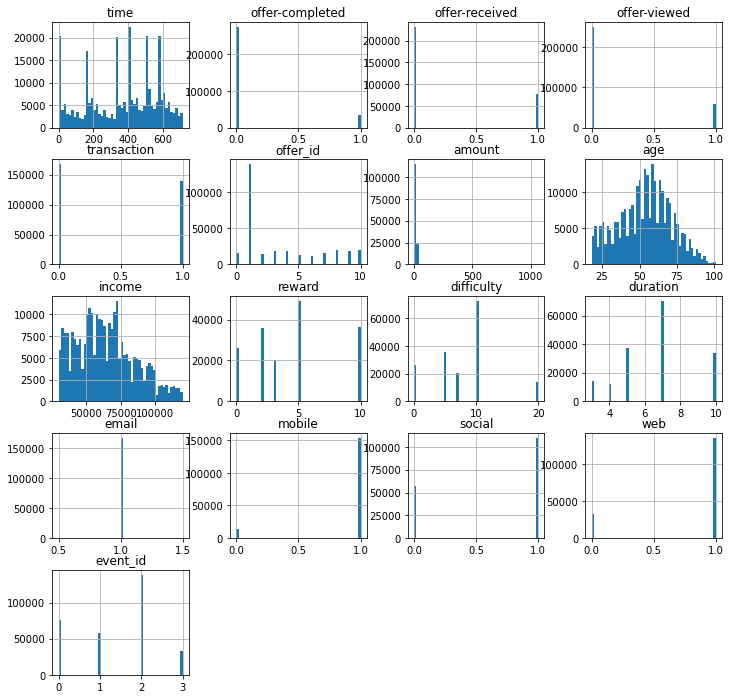

In [69]:
df_cleaned_final.hist(figsize = (12,12), bins=50);

> After having a quick look over the plot we have an idea about data graphically. Most of the variables are in discrete form(those who are having spikes at some points), while three variables have proper distribution. Here i cant say that any distribution is left skewed or right skewed at this point as it is very abstract to say that, let's discuss as we go further

<AxesSubplot:>

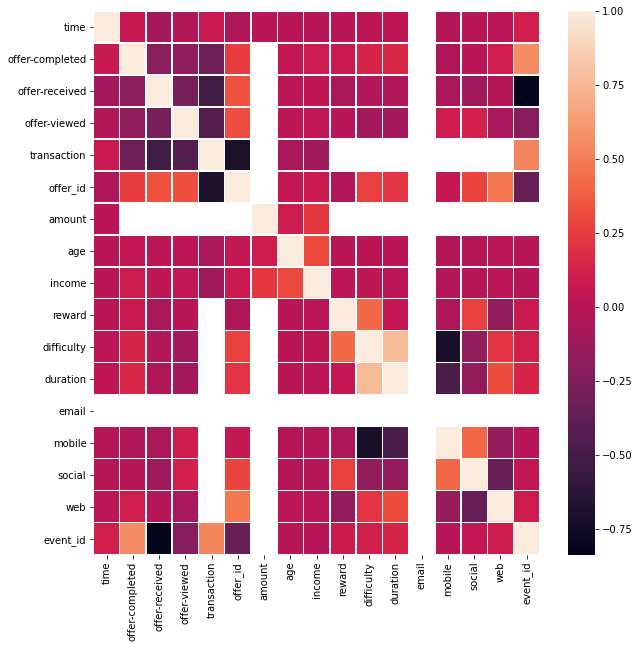

In [70]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
corr = df_cleaned_final.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5, ax=ax)

> Above is the correlation heatmap among variables, we can see covariances corresponding to event_id, offer_completed, offer_viewed, offer_received is very high, so these variables might be important while predection, we can get general idea about how intensely one covariate depends on other.

In [71]:
def label_graph(labelx ,labely, title):
    plt.xlabel(labelx) #give names to x axis
    plt.ylabel(labely) #give names to y axis
    plt.title(title) #give title to graph.

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


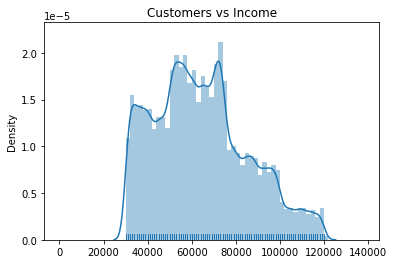

In [72]:
# See histogram of customers income (binning steps of 2000)
sns.distplot(
    x=df_cleaned_final["income"].dropna(), 
    bins=[i * 2_000 for i in range(0, 70)], 
    rug=True
).set_title("Customers vs Income");

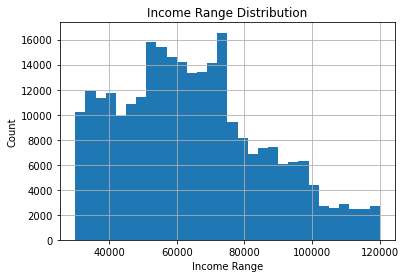

In [73]:
df_cleaned_final.income.hist(bins = 30);
label_graph('Income Range','Count','Income Range Distribution')

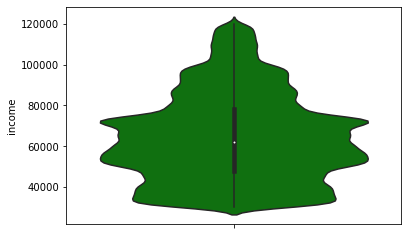

In [74]:
sns.violinplot(data = df_cleaned_final, y = 'income', color="green");

> Here are plots showing density of customer-income, we can see that graph is nearly gaussian(roughly having five modality), we can say that many customers has income between 40k and 80k. Attracting these customers is vey crucial as they can be great market for starbucks, while we can try giving offers personally to customers under 40k income

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


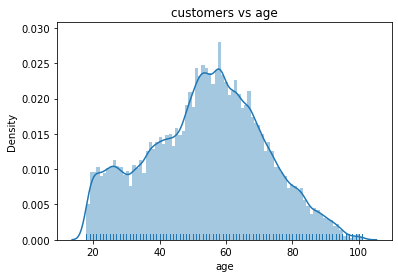

In [75]:
sns.distplot(
    df_cleaned_final["age"].dropna(), 
    bins=int(df_cleaned_final["age"].max() - df_cleaned_final["age"].min() + 1), 
    rug=True
).set_title("customers vs age");

> This plot seems intersting, at first i felt we need not to analyse the age, but in marketing age plays major role. Here we can see most people are within age group of [40-70], so we cannot sell only fast food to them, we need to be more careful about rolling out combo packages. One idea is we can include soup, vegetable salad etc like stuffs with traditional starbucks food to attract them, so in this way for different audience we might have different packages, and through this plot we can easily infer that

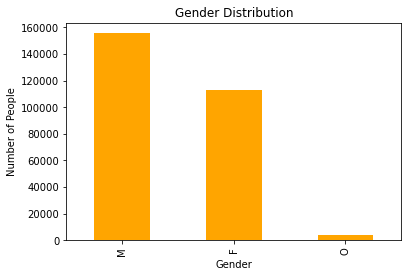

In [76]:
df_ = df_cleaned_final.gender.value_counts()
df_.plot(kind='bar',color="orange")
label_graph('Gender','Number of People','Gender Distribution')

> Just like above gender might be factor for giving adds and offers. We can see that ratio between male and female is approximately 3:2

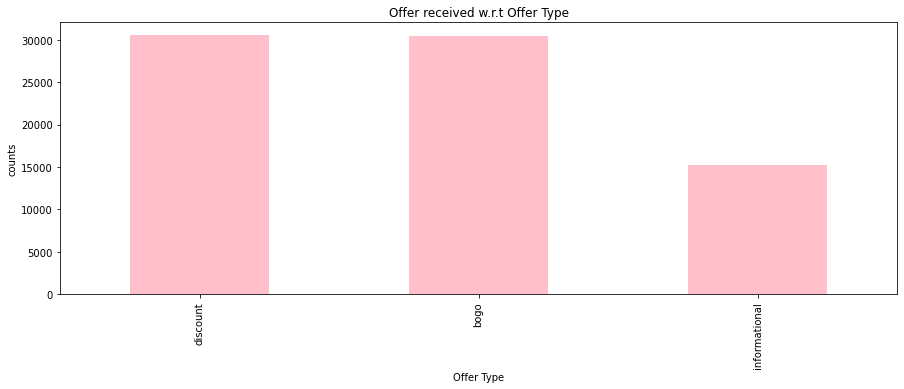

In [77]:
offer_received = df_cleaned_final[df_cleaned_final['offer-received'] == 1].offer_type.value_counts()
offer_received.plot(kind='bar', figsize=(15,5), color="pink")
label_graph('Offer Type','counts','Offer received w.r.t Offer Type')

<AxesSubplot:ylabel='offer_type'>

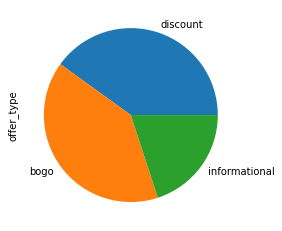

In [78]:
offer_received.plot(kind='pie')

> We can see above barplot as well as pie-plot to see the contribution of each offer type in the dataset. Let's do some paper-work to get more insights.

In [79]:
print(offer_received)

discount         30543
bogo             30499
informational    15235
Name: offer_type, dtype: int64


> It can be clearly seen that dicount offer is most popular, bogo offer is very close to it. Informational is least popular by starbucks

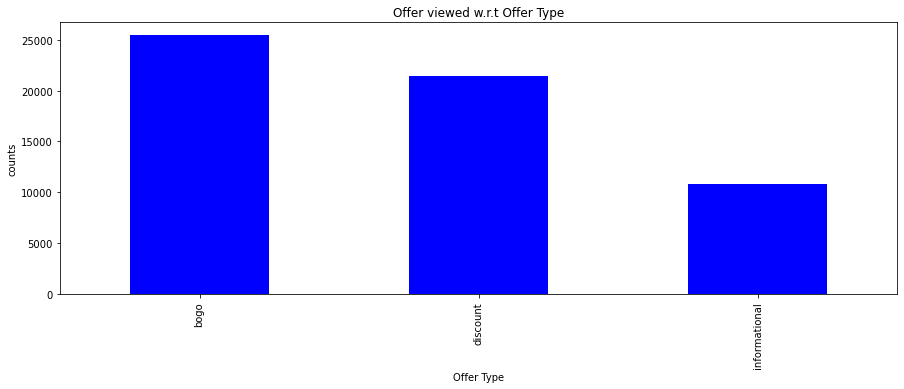

In [80]:
offer_viewed = df_cleaned_final[df_cleaned_final['offer-viewed'] == 1].offer_type.value_counts()
offer_viewed.plot(kind='bar' , figsize=(15,5), color="blue")
label_graph('Offer Type','counts','Offer viewed w.r.t Offer Type')

<AxesSubplot:ylabel='offer_type'>

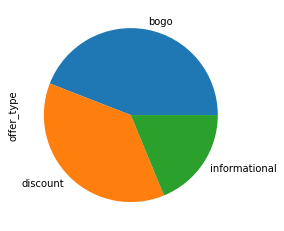

In [81]:
offer_viewed.plot(kind='pie')

> We can see above barplot as well as pie-plot to see the contribution of each offer type in the dataset. Let's see more statistical information below

In [82]:
print(offer_viewed)

bogo             25449
discount         21445
informational    10831
Name: offer_type, dtype: int64


> It can be clearly seen that when offer viewed is to be concerned then bogo offer is most popular, discount offer is second. Informational is least popular by starbucks

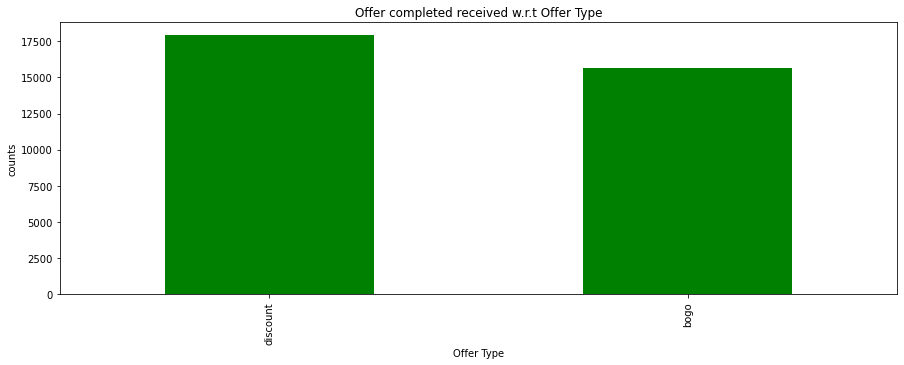

In [83]:
offer_completed = df_cleaned_final[df_cleaned_final['offer-completed'] == 1].offer_type.value_counts()
offer_completed.plot(kind='bar' , figsize=(15,5), color="green")
label_graph('Offer Type','counts','Offer completed received w.r.t Offer Type')

<AxesSubplot:ylabel='offer_type'>

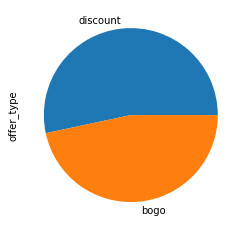

In [84]:
offer_completed.plot(kind='pie')

> We can see above barplot as well as pie-plot to see the contribution of each offer type in the dataset(here no contribution of informational). Let's see more statistical information below

In [85]:
print(offer_completed)

discount    17910
bogo        15669
Name: offer_type, dtype: int64


> It can be clearly seen that when offer completed is to be concerned then discount offer is most popular, bogo offer is very close. Informational gets zero marks here.

`Let's summarize offer_type by aggregating the above results`

In [86]:
print("Let's see overall popularity of Discount offers : ",offer_received.discount+offer_viewed.discount+offer_completed.discount)
print("Let's see overall popularity of Bogo offers : ",offer_received.bogo+offer_viewed.bogo+offer_completed.bogo)

Let's see overall popularity of Discount offers :  69898
Let's see overall popularity of Bogo offers :  71617


This is result:
* BOGO offers are highly demanding. 
* Discount offers are also not lagging behind much.

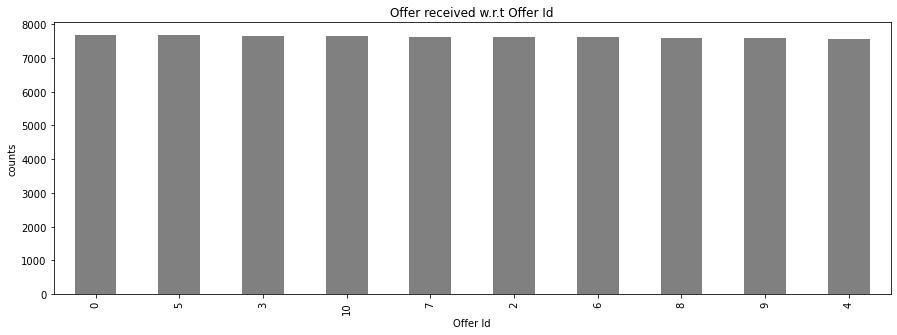

In [87]:
offer_received_ = df_cleaned_final[df_cleaned_final['offer-received'] == 1].offer_id.value_counts()
offer_received_.plot(kind='bar', figsize=(15,5), color="grey")
label_graph('Offer Id','counts','Offer received w.r.t Offer Id')

> We can see easily that every offer has equal chances of recieving, as the graph is completely uniform(discretely)

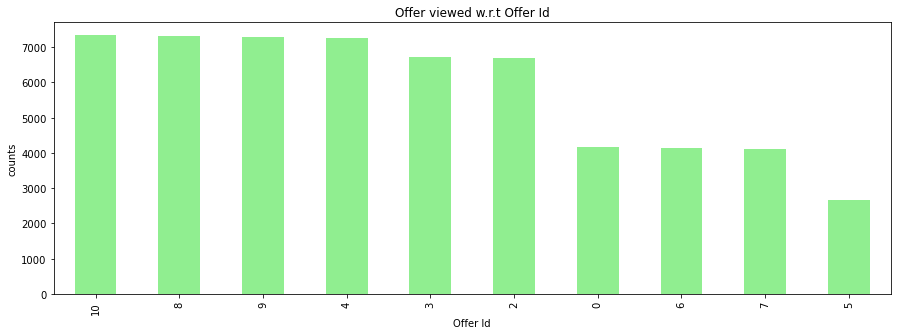

In [88]:
offer_viewed_ = df_cleaned_final[df_cleaned_final['offer-viewed'] == 1].offer_id.value_counts()
offer_viewed_.plot(kind='bar' , figsize=(15,5), color="lightgreen")
label_graph('Offer Id','counts','Offer viewed w.r.t Offer Id')

> Here is the plot of offer viewed, we can clearly see that it is not uniform(kind of midely right skewed), so different offer_id have different probability of being viewed, this kinda makes sense because this might depends on user interest, interesting offers attracts more customers(and users view only those)

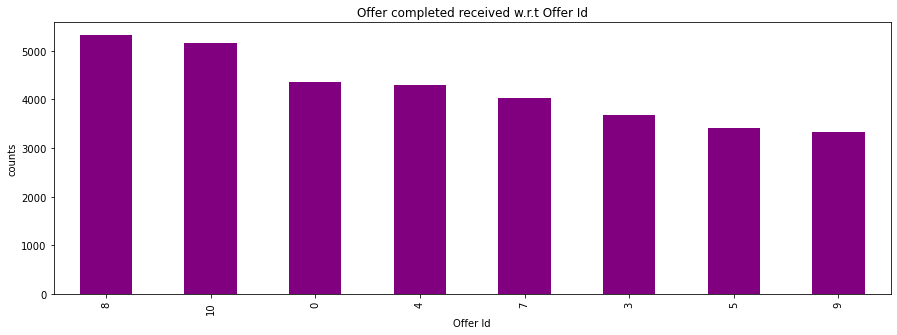

In [89]:
offer_completed_ = df_cleaned_final[df_cleaned_final['offer-completed'] == 1].offer_id.value_counts()
offer_completed_.plot(kind='bar' , figsize=(15,5), color="purple")
label_graph('Offer Id','counts','Offer completed received w.r.t Offer Id')

> Here is the plot of offer completed, we can clearly see that it is not uniform(overall decreasing height) just as previous one, so different offer_id have different probability of being completely, this kinda makes sense as this is somehow related to offer_viewed and i was expected similar behaviour, because this might depends on user interest, interesting offers attracts more customers(and users view and buy only those). **BY THE WAY OFFER COMPLETION RATE IS VERY DECENT, THAT's WHY STARBUCKS MAKES GREAT PROFIT**

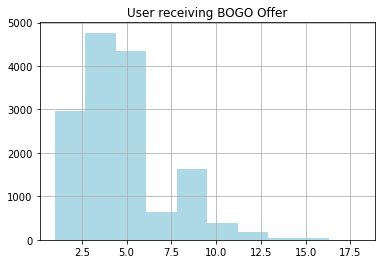

In [90]:
temp1 = df_cleaned_final[df_cleaned_final['offer_type']=='bogo']
temp1.groupby('id')['offer-received'].count().hist(color="lightblue");
plt.title('User receiving BOGO Offer');

> Bogo offers as we have already seen, has great response among users, so this plot kind of confirms that, further the graph is little bit right skewed, aroung 4500-4800 users are interested in this at some point.

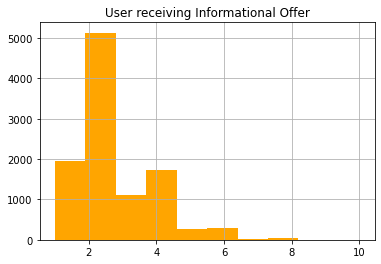

In [91]:
temp2 = df_cleaned_final[df_cleaned_final['offer_type']=='informational']
temp2.groupby('id')['offer-received'].count().hist(color="orange");
plt.title('User receiving Informational Offer');

> Informational offers are not that popular as compared to bogo(see the area of plot) as we have already seen, further the graph is little bit right skewed, aroung 4500-4800 users backs up this at some point(very less).

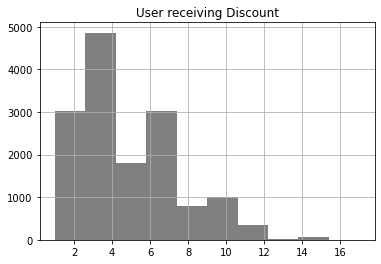

In [92]:
temp3 = df_cleaned_final[df_cleaned_final['offer_type']=='discount']
temp3.groupby('id')['offer-received'].count().hist(color="grey");
plt.title('User receiving Discount');

> Discount offers as we have already seen, has great response among users, so this plot kind of confirms that, further the graph is little bit right skewed, remeber that area is less than bogo offers which is completely inclined with our previous analysis results, further aroung 4500-4800 users are interested in this at some point.

## SUMMARY:

Going through all the above plots and discussions let's bring them together:<br>
1. Many customers has income between 40k and 80k. Attracting these customers is vey crucial as they can be great market for starbucks, while we can try giving offers personally to customers under 40k income.
2. Most people are within age group of [40-70], so we cannot sell only fast food to them, we need to be more careful about rolling out combo packages. One idea is we can include soup, vegetable salad etc like stuffs with traditional starbucks food to attract them.
3. Gender might be factor for giving adds and offers. We can see that ratio between male and female is approximately 3:2, e.g. let's say female like deserts so we can do that for them.
4. Bogo offers are most recieved followed by dicount offers, in general too Bogo offers are very popular.
5. Dicount offer are most viewed followed by bogo offer, this makes sense naturally as attrative discounts indeed catch more people.
6. Different offer_id have different probability of being viewed, this kinda makes sense because this might depends on user interest, interesting offers attracts more customers(and users view only those).

So different offer were given to different section of people depending upon locations, gender etc, and change in market hugely depend upon it. Offer recieved for some region might be different from others similarly offer viewed depends upon this and various other factors. The outcome of these is certainly transaction done/completed or cancelled.

# Modeling and Predictions :

## Feature Engineering :
> This section includes feature transformation and selection, so that it works well during prediction.

In [126]:
df_cleaned_final_copy = df_cleaned_final.copy()

> Creating a copy of dataset and naming it as `df_cleaned_final_copy`

In [127]:
offers_ = {'bogo': 0, 'discount': 1, 'informational': 2}
df_cleaned_final_copy['offer_type'] = df_cleaned_final_copy['offer_type'].map(offers_)

genders = {'O': 0, 'M': 1, 'F': 2}
df_cleaned_final_copy['gender'] = df_cleaned_final_copy['gender'].map(genders)
print("Done")

Done


> For prediction and model fitting(using various classifier) i am trying to make categorical variable as ordinal

In [128]:
df_cleaned_final_copy.replace([np.inf, -np.inf], np.nan)
print("Replacement Done")

Replacement Done


> Replacing all `-oo` or `+oo` terms as they might hamper model training, so i have decided to replace all these terms with NaN

In [129]:
np.isfinite(df_cleaned_final_copy.all())

id                  True
event               True
time                True
offer-completed     True
offer-received      True
offer-viewed        True
transaction         True
offer_id            True
amount              True
gender              True
age                 True
became_member_on    True
income              True
reward              True
difficulty          True
duration            True
offer_type          True
email               True
mobile              True
social              True
web                 True
event_id            True
dtype: bool

> After doing this we can see everything is finite

In [130]:
h_parameter = 1
df_cleaned_final_copy.fillna(h_parameter, inplace=True)

> Replacing each NaN terms with h_parameter, which i got after standarization and taking mean.

In [131]:
df_cleaned_final_copy.corr()

,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,gender,age,income,reward,difficulty,duration,offer_type,email,mobile,social,web,event_id
time,1.000000,0.060702,-0.097121,-0.029075,0.069098,-0.045975,0.022162,0.001751,0.004637,0.000975,-0.035630,-0.034429,-0.051171,0.008925,NaN,0.003532,0.023273,0.032311,0.116606
offer-completed,0.060702,1.000000,-0.201873,-0.168942,-0.319382,0.257104,-0.088351,0.062476,0.089228,0.121405,0.236296,0.313872,0.356229,-0.204824,NaN,-0.096566,-0.147029,-0.004840,0.564058
offer-received,-0.097121,-0.201873,1.000000,-0.277229,-0.524097,0.335274,-0.144982,-0.009195,-0.012045,-0.005174,0.253859,0.337239,0.437011,-0.054441,NaN,-0.154789,-0.314923,-0.177324,-0.835837
offer-viewed,-0.029075,-0.168942,-0.277229,1.000000,-0.438602,0.321298,-0.121331,-0.008884,-0.014065,-0.006408,0.248349,0.235120,0.340536,-0.092544,NaN,-0.002962,-0.091313,-0.198423,-0.208121
transaction,0.069098,-0.319382,-0.524097,-0.438602,1.000000,-0.704814,0.276632,-0.024234,-0.034474,-0.066641,-0.563761,-0.674456,-0.870468,0.248465,NaN,0.197340,0.437459,0.312871,0.535471
offer_id,-0.045975,0.257104,0.335274,0.321298,-0.704814,1.000000,-0.194974,0.017004,0.025565,0.049253,0.370181,0.619084,0.691759,-0.066087,NaN,-0.099805,-0.123958,0.100725,-0.341970
amount,0.022162,-0.088351,-0.144982,-0.121331,0.276632,-0.194974,1.000000,0.063113,0.084313,0.136672,-0.155954,-0.186576,-0.240799,0.068733,NaN,0.054591,0.121015,0.086550,0.148128
gender,0.001751,0.062476,-0.009195,-0.008884,-0.024234,0.017004,0.063113,1.000000,0.265325,0.311031,0.023083,0.025184,0.024123,-0.016557,NaN,-0.011683,-0.014196,-0.004349,0.031560
age,0.004637,0.089228,-0.012045,-0.014065,-0.034474,0.025565,0.084313,0.265325,1.000000,0.650161,0.028121,0.035629,0.036598,-0.019417,NaN,-0.016422,-0.017871,-0.006097,0.044663
income,0.000975,0.121405,-0.005174,-0.006408,-0.066641,0.049253,0.136672,0.311031,0.650161,1.000000,0.052101,0.063604,0.066878,-0.033466,NaN,-0.027059,-0.035065,-0.013736,0.045800


> After analysing the correlation of covariates i decided to drop 'event', 'became_member_on', 'offer-completed', 'offer-received', 'offer-viewed', 'transaction'. Further i will drop 'id' too as it will become my label.<br>
> `So my data-set is X and label is y.`

## Final Dataset Created

In [132]:
X = df_cleaned_final_copy.drop(['id', 'event_id' , 'event' , 'became_member_on','offer-completed', 'offer-received',
       'offer-viewed', 'transaction'], axis=1)
y = df_cleaned_final_copy['event_id']

>`Dataset Created!`

## Training Phase

### In this phase i will be creating three models, and give comparision between models.

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Flatten

> All necessary libraries are imported for prediction

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

> Using train_test_split, and creating test-dataset, 30% dataset is used for prediction and remaining for training

## MODEL I : Neural Net with one Layer 

In [135]:
X_train_value = X_train.values
X_test_value = X_test.values
y_train_value = y_train.values
y_test_value = y_test.values

> Converting dataframe to numpy arrays

In [136]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(4, activation = 'softmax'))
model1.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])
model1_history = model1.fit(X_train_value, y_train_value, 
                            validation_data=(X_test_value, y_test_value), 
                            epochs=50, batch_size=100)

Train on 214573 samples, validate on 91961 samples
Epoch 1/50
214573/214573 [==============================] - 2s 9us/step - loss: 2159.9024 - accuracy: 0.4514 - val_loss: 3.5626 - val_accuracy: 0.6071
Epoch 2/50
214573/214573 [==============================] - 2s 9us/step - loss: 4.5860 - accuracy: 0.5862 - val_loss: 7.0116 - val_accuracy: 0.5878
Epoch 3/50
214573/214573 [==============================] - 2s 9us/step - loss: 4.7048 - accuracy: 0.6036 - val_loss: 3.6912 - val_accuracy: 0.6845
Epoch 4/50
214573/214573 [==============================] - 2s 9us/step - loss: 4.4136 - accuracy: 0.6214 - val_loss: 4.8220 - val_accuracy: 0.6194
Epoch 5/50
214573/214573 [==============================] - 2s 9us/step - loss: 4.6126 - accuracy: 0.6294 - val_loss: 3.0763 - val_accuracy: 0.6787
Epoch 6/50
214573/214573 [==============================] - 2s 9us/step - loss: 4.8109 - accuracy: 0.6320 - val_loss: 6.8710 - val_accuracy: 0.6157
Epoch 7/50
214573/214573 [==============================] 

> We can see that validation accuracy is around 63-64% (it might change when you run), let's try to add more layers and see whether accuracy increases or not

## MODEL II: Neural Nets with four layers

In [141]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(keras.layers.Dense(8, activation='relu'))
model2.add(Dropout(0.1))
model2.add(keras.layers.Dense(4, activation = 'softmax'))
model2.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])
model2_history = model2.fit(X_train_value, y_train_value, 
                            validation_data=(X_test_value, y_test_value),
                            epochs=50, batch_size=100)                                 

Train on 214573 samples, validate on 91961 samples
Epoch 1/50
214573/214573 [==============================] - 3s 16us/step - loss: 101.5175 - accuracy: 0.4219 - val_loss: 1.2600 - val_accuracy: 0.4557
Epoch 2/50
214573/214573 [==============================] - 3s 15us/step - loss: 1.4920 - accuracy: 0.4519 - val_loss: 1.2601 - val_accuracy: 0.4557
Epoch 3/50
214573/214573 [==============================] - 4s 19us/step - loss: 1.3468 - accuracy: 0.4532 - val_loss: 1.2577 - val_accuracy: 0.4603
Epoch 4/50
214573/214573 [==============================] - 4s 20us/step - loss: 1.2710 - accuracy: 0.4564 - val_loss: 1.2559 - val_accuracy: 0.4608
Epoch 5/50
214573/214573 [==============================] - 4s 17us/step - loss: 1.2615 - accuracy: 0.4596 - val_loss: 1.2415 - val_accuracy: 0.4757
Epoch 6/50
214573/214573 [==============================] - 3s 15us/step - loss: 1.2400 - accuracy: 0.4747 - val_loss: 1.2255 - val_accuracy: 0.4842
Epoch 7/50
214573/214573 [===========================

> Adding more layers reduces the validation accuracy, what could be the reasons ?<br>
    1. We added dropout here which act as regularizer so model might underfits.<br>
    2. Since adding more layers leads to more parameters so in order to train them, we might not be able to provide adequate quantity of training dataset.<br>
    3. Dataset might be simpler and such complex model are not needed.<br>

Indeed option 3 needs to be checked, that's my next models, i will try fitting the dataset in random forest as well as decision tree.

## MODEL III: Random Forest Classifier

In [143]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

> Here i am fitting the data in random forest classifier, random state is set to 42(after hyperparameter tuning)

In [144]:
print("The score by MODEL III is ",model3.score(X_test,y_test))

The score by MODEL III is  0.782038037863877


In [146]:
y_pred = model3.predict(X_test)
print("Printing Confusion Matrix below :\n\n\n")
print(confusion_matrix(y_test, y_pred))
print("\n\n\n")
print("Classification Report Below :\n\n\n")
print(classification_report(y_test, y_pred))

Printing Confusion Matrix below :



[[18705  3369     0   646]
 [ 5137  7826     0  4276]
 [    0     0 41905     0]
 [ 1464  5152     0  3481]]




Classification Report Below :



              precision    recall  f1-score   support

           0       0.74      0.82      0.78     22720
           1       0.48      0.45      0.47     17239
           2       1.00      1.00      1.00     41905
           3       0.41      0.34      0.38     10097

    accuracy                           0.78     91961
   macro avg       0.66      0.66      0.66     91961
weighted avg       0.77      0.78      0.78     91961



> Random Forest is giving accuracy better than the above two models, accuracy is around 78%(might change while you run)

## MODEL IV: Decision Tree Classifier

In [147]:
model4 = DecisionTreeClassifier(random_state=42)
model4.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

> Here i am fitting the data in decision tree, random state is set to 42(after hyperparameter tuning)

In [148]:
print("The score by MODEL IV is ",model4.score(X_test,y_test))

The score by MODEL IV is  0.8138558736855841


In [149]:
y_pred = model4.predict(X_test)
print("Printing Confusion Matrix below :\n\n\n")
print(confusion_matrix(y_test, y_pred))
print("\n\n\n")
print("Classification Report Below :\n\n\n")
print(classification_report(y_test, y_pred))

Printing Confusion Matrix below :



[[19174  2961     0   585]
 [ 3718  9128     0  4393]
 [    0     0 41905     0]
 [  805  4656     0  4636]]




Classification Report Below :



              precision    recall  f1-score   support

           0       0.81      0.84      0.83     22720
           1       0.55      0.53      0.54     17239
           2       1.00      1.00      1.00     41905
           3       0.48      0.46      0.47     10097

    accuracy                           0.81     91961
   macro avg       0.71      0.71      0.71     91961
weighted avg       0.81      0.81      0.81     91961



Decision Tree is giving accuracy better than the above three models, accuracy is around 81%(might change while you run)

In [156]:
def find_parameters(X,y):
    '''
    input:
    - X,y: training datasets for X and y
    output:
    - dictionary with best parameters for random forest model
    '''
    
    param_grid={'max_features': ['auto', 'sqrt'],
                'max_depth' : [2,4,8],
                'n_estimators': [2,4,8],
                'min_samples_split': [2, 4, 8],
                'min_samples_leaf': [2,4,6,8],
                }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [157]:
# DON'T RUN IT, UNLESS REQUIRED AS IT WILL TAKE SOME TIME
# find_parameters(X_train, y_train)

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2}

> To be more specific we can also use grid search to find parameters, but here i have already used to, please try not to run the find_parameters() function as it might take some time.<br>
> If one should select random forest if max depth would be 8 then min split would be 2 and min sample leaf will also be 2

## About Evalution Criteria

I am using F1-score most of the time for evaluation, as it also takes into consideration the distribution, accuracy blindly calculate the score and do not take into consideration the internal architecture of dataset. To explain this i am taking an example consider a binary classification task where data set has 100 samples with 90 negative sample and 10 positive sample. <br>
**BAD CLASSIFIER** : Suppose i made one line classifier who predicts only negative samples, i.e., even if we have positive dataset it will be predicted as negative. See how bad this classifier is, but it's accuracy is 90%, while its F1 score is 0.<br><br>

## Saving the best model

In [150]:
import pickle
# Only use it when required changing
# pickle.dump(model4,open('model', 'wb'))

> Please `comment off` the above line to overwrite the model.

## SUMMARY :

So in this section we trained four different models and we can say overall that these models had incresing complexity, but it turns out that simplest model outperforms all others in terms of accuracy. <br>
Further this might happens because our data-set after cleaning became close to ideal, that's why data-preprocessing is crucial step. Also if we will use more complex model then we might also fullfill the requirement of data, to train those parameters. Further regularization also plays major role in accuracy, here since the dataset and covariates were simple and complementing each other so excessive use of regularizer might produce negative effect: e.g., model 2 has lower accuracy than model1 since we added dropouts, similarly model 3 has lower accuracy than model 4 as random forests are ensemble of decision tree with inherent regularization effect inside them. <br><br>

 1. We concluded that when we get enough data like transaction', 'offer_id', 'amount', 'gender', 'age', 'income' we can easly target audience with respectable accuracy, that's how starbuck is working i guess.<br><br>
 2. There may be many improvements in terms of predictions, potential improvements which i could think of are using higher order features, using features has combination of others, selecting different model pipeline(maybe using gridsearch), doing something different with respect to data-cleaning, adding more features or deleting some.

# CONCLUSION

I firstly like to thanks udacity team for this awesome project, also i would like to thanks the grader who will be grading this project. I found some part of project challenging specially data cleaning part and model training part. The `transcript` dataset was really challenging and my most of the time consumes in cleaning that bit, but overall the experience was really nice. <br>

## END TO END PROJECT DESCRIPTION

1. Data exploration, here i did finding of NaNs, Inf and other abnormal values, observing the data-types and categories of dataset.
2. Data cleaning/preprocessing, here i first changes names of some columns so that it is helpful in merging, further i managed categorical data-type by mapping them to int(ordinal) so that classifier do not make errors in them. Further i replaced all Inf values and NaN by the mean of dataset. Also i splitted multiple valued columns into single columns, basically i changed the dataset to 3NF.
3. Exploratory data analysis, here i saw correlation between features and then selected some features for training, also i plotted some features just to see how their distribution is. Further from their got to know few statistics result like how many persons are male, how many are getting discount offers etc.
4. Finally i trained four models based on feature selection, and used hyperparameter tuning especially for random forest classifier. My criteria of model selection was validation accuracy, and i managed decision tree model with validation accuracy 81%.

## BRIEF OVERVIEW(REFLECTIONS)

The quandary that I opted to solve was to build a model that checks whether a customer will respond to an offer. My strategy for solving this problem has overall four steps(talking abstarct). Firstly, I coalesced offer portfolio, customer profile, and transaction data. Secondly, I had done feature selection and data cleaning related to that(feature selection), i have used correlation matrix too. Thirdly, I assessed the precision and F1-score of a problem model that postulates all offers. Finally, I compared the performance of neural nets, random forest, and decision models. This analysis suggests that an decision tree model has the best training data precision and F1-score(around 0.81). I also refined random forest model hyperparameters utilizing a grid search but still decision tree was overall best for my analysis.<br>


`1. How an offer works in starbucks in general? What are the top offers provided by them?`<br>
The ads/offers are sent through different forms(multiple channels), one can easily see from the plots and data analysis above that different populations have different ads/offers(at least differing by gender, age, income and/or since they are customers). Also top offers are completely subjective to particular population, let's again see the scenario since most people are within age group of [40-70], so we cannot sell only fast food to them, we need to be more careful about rolling out combo packages.  One idea is we can include soup, vegetable salad etc like stuffs with traditional starbucks food to attract them. So for them top offers will be this combo.
Gender might be factor for giving adds and offers. We can see that ratio between male and female is approximately 3:2, e.g. let's say female like deserts so this might be top feature for them.<br>

`2. What is change in market of starbucks when some offer is there?`<br>
Market is highely depends uponn offers as we have already seen this in Exploratory data analysis, we have seen that different offer_id have different probability of being viewed, this kinda makes sense because this might depends on user interest, interesting offers attracts more customers(and users view only those).<br>

`3. How user action parameters(say viewed, offer recieved, transaction done, cancelled, completed) are related to demographic attributes or other attributes that company floats?`<br>
I was thinking that there will be no relation between these, i.e., customers will not be influenced by these attributes but after analysing the plots and model i realized that there was some gap in my thought, different offer were given to different section of people depending upon locations, gender etc, and change in market hugely depend upon it. Offer recieved for some region might be different from others similarly offer viewed depends upon this and various other factors. The outcome of these is certainly transaction done/completed or cancelled.


## POTENTIAL IMPROVEMENTS

1. One can think of using multiple features or higher order features for better prediction accuracy. 
2. Data cleaning could be performed more aggresively, e.g., handling missing value can be done using some heuristics made after doing deep analysis of dataset.
3. I didn't used all the features because i didn't find any use of them, maybe these features could give hidden insights, e.g., I could not think of additional features using the time data.
4. Choice of model, one might think more complex Neural nets with suitable dropouts, Boosted Trees, Naive Bayes model or may try SVM. Hyperparameters and number of epochs specially in neural networks could be increased.

# REFERENCES


1. https://stackoverflow.com/questions/37600711/pandas-split-column-into-multiple-columns-by-comma
2. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
4. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
5. https://www.tensorflow.org/tutorials/keras/classification

